# Análise Exploratória de Trens de PA

## Comparando séries de disparos 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pega_dados(nome_arquivo):
    # função auxiliar para carregar dados do repositório
    repo = 'https://github.com/borismarin/sample-data/blob/master/neuro-comp/'
    url = ''.join((repo, nome_arquivo, '?raw=true'))
    dados = np.DataSource().open(url, 'rb')
    return np.load(dados, allow_pickle=True)
    
# Começamos carregando um arquivo com trens de spikes. 
# O arquivo 'cinco_tipos.npy' contém séries de spikes para 5 células distintas
# Dados baseados em http://people.brandeis.edu/~pmiller/TEXTBOOK/CHAPTER3/spikes_cv_isis.m

cinco_tipos = pega_dados('cinco_tipos.npy') # carrega arquivo com 5 traços

(224.0, 226.0)

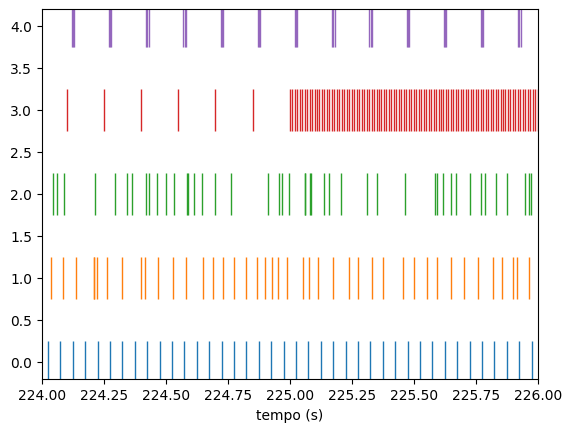

In [2]:
# Raster Plot das cinco séries
plt.figure(0)
for i, serie in enumerate(cinco_tipos): # raster com as cinco séries
    plt.plot(serie, i * np.ones_like(serie), '|', markersize=30)
plt.xlabel('tempo (s)')
plt.xlim(224,226) # "zoom" conveniente em t

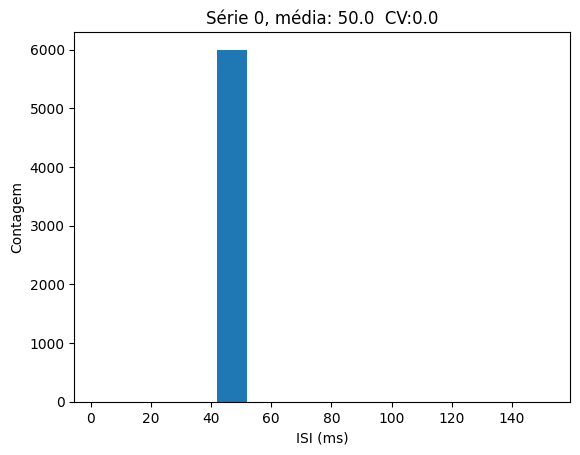

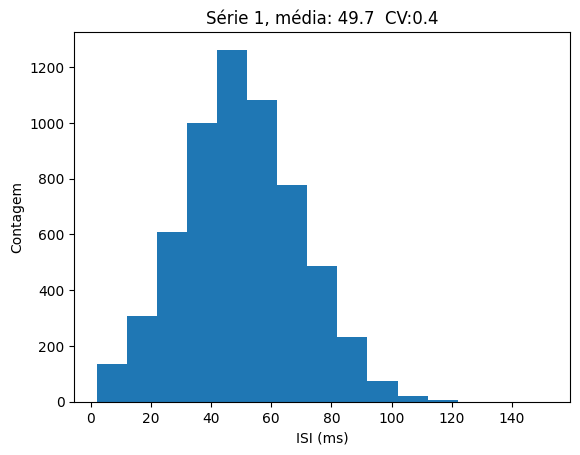

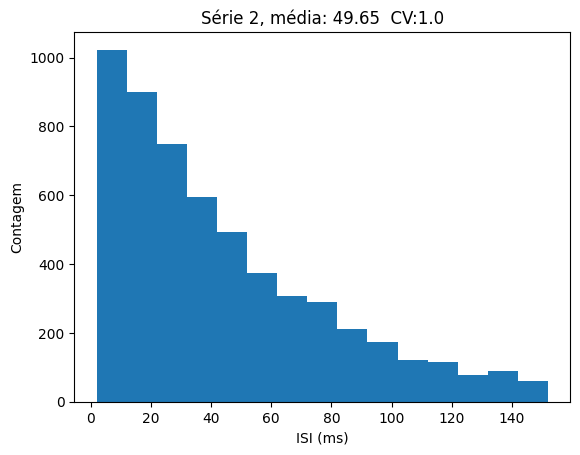

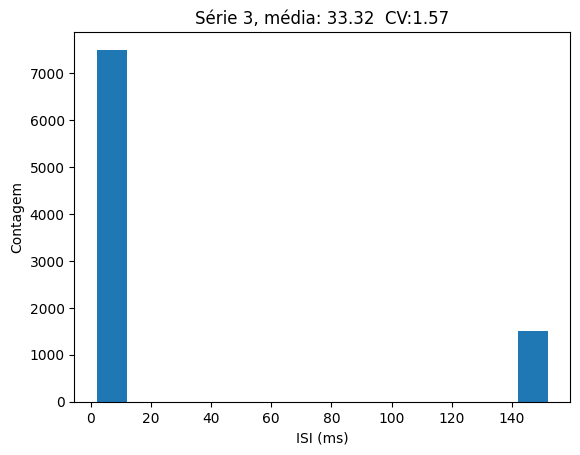

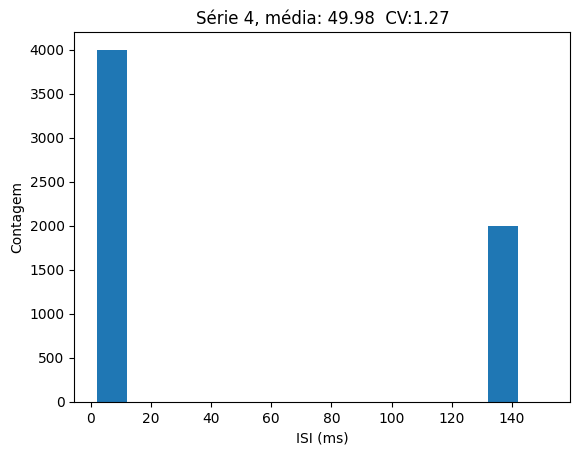

In [3]:
# histograma dos ISI e coeficiente de variação para cada série
for i, serie in enumerate(cinco_tipos): 
    isis = np.diff(serie) * 1000 # para ISI em ms
    cv = np.std(isis)/np.mean(isis)
    plt.figure(1+i)
    plt.title(f'Série {i}, média: {round(np.mean(isis),2)}  CV:{round(cv, 2)}')
    plt.xlabel('ISI (ms)')
    plt.ylabel('Contagem')
    plt.hist(isis, np.arange(2, 156, 10)) # bins fixos para comparar


## Taxa de disparos dependente do tempo, PSTH

In [4]:
# O arquivo 'mil_repetidos.npy' contém séries de spikes de um mesmo neurônio,
#  para mil repetições de um experimento. Neste experimento, gravam-se os spikes
#  do neurônio por 1.5s, sendo um estímulo aplicado em t=0.5s

mil = pega_dados('mil_repetidos.npy') # carrega arquivo com mil traços

Text(0.5, 0, 'tempo (s)')

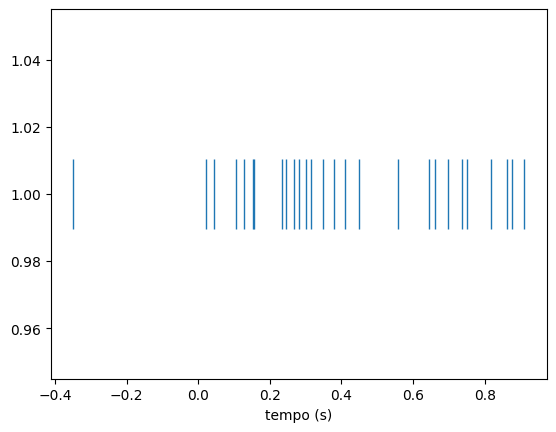

In [5]:
# raster para a primeira das mil séries
plt.figure(6)
n = 42
plt.plot(mil[n], np.ones_like(mil[n]), '|', ms=50) # disparos parecem aleatórios
plt.xlabel('tempo (s)')

CV 1.43210746176225


Text(0, 0.5, 'Contagem')

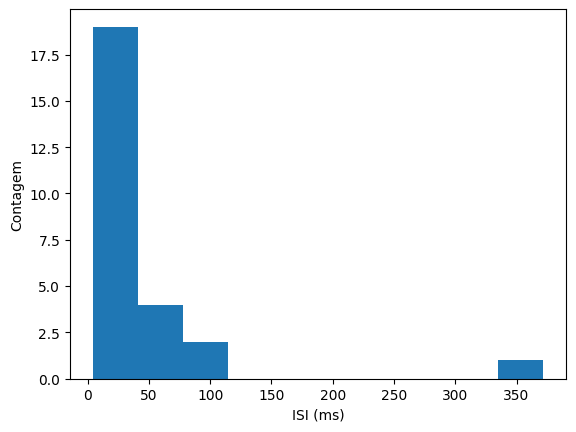

In [6]:
plt.figure(7)
isi = np.diff(mil[n]) * 1000
plt.hist(isi)  # histograma dos ISI parece com qual caso acima?
print('CV', np.std(isi)/np.mean(isi))
plt.xlabel('ISI (ms)')
plt.ylabel('Contagem')

Text(0.5, 0, 'tempo em relação a início do estímulo (s)')

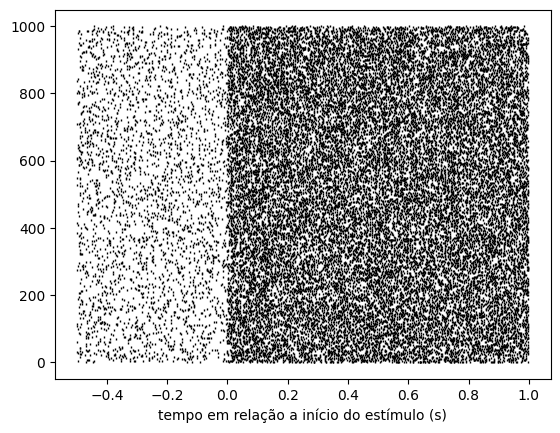

In [7]:
plt.figure(8)
for i, serie in enumerate(mil): # raster das mil repetições
    plt.plot(serie, i * np.ones_like(serie), '|k', ms=1) 
plt.xlabel('tempo em relação a início do estímulo (s)')

Text(0.5, 0, 'tempo em relação a início do estímulo (s)')

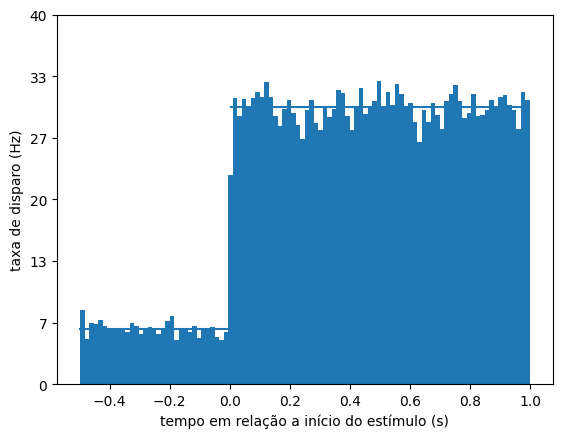

In [8]:
# taxa de disparo dependente do tempo

todos_spikes = np.concatenate(mil) # juntamos as mil séries num listão
plt.figure(9)
plt.hist(todos_spikes, bins=100) # dessa forma, basta fazer um histograma de tudo
plt.hlines(90, -0.5, 0) # média a olho
plt.hlines(450, 0, 1) # média a olho

# reetiqueta o eixo y em unidades de frequência
def nspikes_para_freq(nspikes, t_total, repetições, n_bins):
    tamanho_bin = t_total / n_bins
    return nspikes / (repetições * tamanho_bin) 
ticks, labels = plt.yticks()
plt.yticks(ticks, [round(nspikes_para_freq(tick, 1.5, 1000, 100)) for tick in ticks])
plt.ylabel('taxa de disparo (Hz)')
plt.xlabel('tempo em relação a início do estímulo (s)')
